# The Spark Foundation-GRIP: Data Science & Business Analytics Intern-Nov21
**Task 1:** Prediction Using Supervised ML

**Author:** Pallab Chowdhury

**Dataset:** http://bit.ly/w-data

**Problem:** What will be predicted score if a student studies for 9.25 hrs/day?

# Importing all libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Inport Dataset

In [2]:
path = "http://bit.ly/w-data"
df = pd.read_csv(path)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Prepare the Dataset

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#Split the Dataset Into Train & Test 

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Plotting the distribution of scores


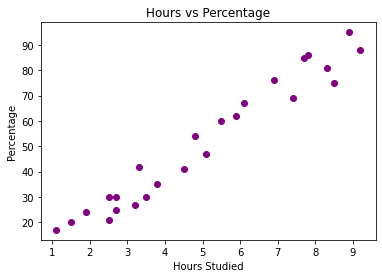

In [5]:
plt.scatter(X, y, color = "purple")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

# Training the Model

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train)

# print the coefficients
print(lr.intercept_)
print(lr.coef_)

2.018160041434662
[9.91065648]


In [8]:
### STATSMODELS ###

# create a fitted model
ls = smf.ols(formula='Scores ~ Hours', data=df).fit()

# print the coefficients
ls.params

Intercept    2.483673
Hours        9.775803
dtype: float64

# Predict the Model 

In [9]:
### Scikit-Learn ###
y_pred = lr.predict(X_test)

# Visualize the Train, Test & prediction

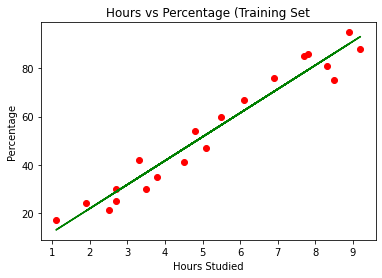

In [10]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Hours vs Percentage (Training Set")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

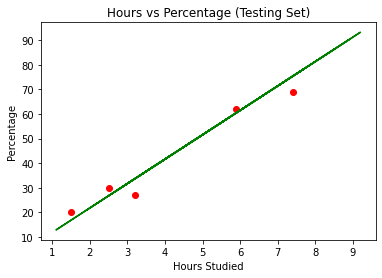

In [11]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Hours vs Percentage (Testing Set)")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

# Plotting the Least Squares Line

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


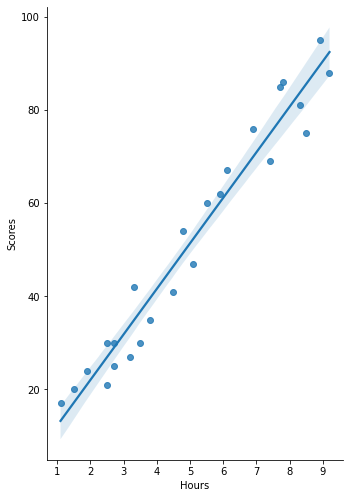

In [12]:
sns.pairplot(df, x_vars=['Hours'], y_vars='Scores', size=7, aspect=0.7, kind='reg')

# Compare the Results

In [13]:
cmp= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
cmp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Testing with custom data

In [14]:
hours = 9.25
pred = lr.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
### STATSMODELS ###

X_new = pd.DataFrame({'Hours': [9.25]})

# predict for a new observation
ls.predict(X_new)

0    92.909855
dtype: float64

# Confidence in our Model

In [16]:
### STATMODELS ###
ls.conf_int()

,0,1
Intercept,-2.753470,7.720817
Hours,8.838823,10.712784


In [17]:
### STATSMODELS ###

# print the p-values for the model coefficients
ls.pvalues

Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64

# Evaluating the model

In [18]:
### STATSMODELS ###

# print the R-squared value for the model
ls.rsquared

0.9529481969048356

In [19]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lr.score(X, y)

0.9526947647057273

In [20]:
from sklearn import metrics  o
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
